In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Symptome disease file

## 1 clean data

### 1.0  Load and check data

In [3]:
#Google collab import
#from google.colab import drive
#drive.mount('/content/drive')
#df=pd.read_csv('/content/drive/MyDrive/Notebooks/MedAI/raw_data/Final_Augmented_dataset_Diseases_and_Symptoms.csv')
#df_symp=df

In [5]:
df_symp = pd.read_csv('../raw_data/Final_Augmented_dataset_Diseases_and_Symptoms.csv')

In [6]:
df_symp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246945 entries, 0 to 246944
Columns: 378 entries, diseases to neck weakness
dtypes: int64(377), object(1)
memory usage: 712.2+ MB


In [7]:
df_symp.head()

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#some symtomes have only 1 value, which makes no sense if teh value is 0, so we will drop them
#select columns with only 1 unique value

df_symp.nunique()

,0
diseases,773
anxiety and nervousness,2
depression,2
shortness of breath,2
depressive or psychotic symptoms,2
...,...
hip weakness,1
back swelling,1
ankle stiffness or tightness,1
ankle weakness,2


In [9]:
# Check the shape
print(df_symp.shape)


(246945, 378)


### 1.1 Droping col (symptoms) with only 0 values -> No disease

In [10]:
#Identify columns with only one unique value
columns_single_value = [col for col in df_symp.columns if df_symp[col].nunique() == 1]
df_symp_single_value = df_symp[columns_single_value]

49

In [11]:
df_symp_single_value = df_symp[columns_single_value]
df_symp_single_value.sum().max()
df_symp_single_value
#we can drop all the columns with only one unique value, since hey are all 0 ->

,pus in sputum,underweight,arm cramps or spasms,abnormal appearing tongue,pallor,shoulder cramps or spasms,joint stiffness or tightness,eye strain,pus in urine,abnormal size or shape of ear,...,low back stiffness or tightness,skin on head or neck looks infected,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,hip weakness,back swelling,ankle stiffness or tightness,neck weakness
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246942,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246943,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_symp_col_filtered= df_symp.drop(columns = columns_single_value)

In [13]:
df_symp_col_filtered

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,redness in or around nose,wrinkles on skin,foot or toe weakness,hand or finger cramps or spasms,back stiffness or tightness,wrist lump or mass,skin pain,low urine output,sore in nose,ankle weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246940,open wound of the nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246941,open wound of the nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246942,open wound of the nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246943,open wound of the nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1.1 Remove diseases with only 1 (TBC) observation (No Train / test split possible)

In [30]:
# Remove classes with only 1 observation
class_counts = df_symp_col_filtered['diseases'].value_counts()
class_counts

,count
diseases,
cystitis,1219
vulvodynia,1218
nose disorder,1218
complex regional pain syndrome,1217
spondylosis,1216
...,...
myocarditis,1
high blood pressure,1
typhoid fever,1


In [15]:
filtered_classes = class_counts[class_counts > 100].index

len(filtered_classes)

754

In [52]:
test=class_counts[class_counts > 100]

In [53]:
len(test)

443

In [16]:
# Filter the dataset
df_symp_filtered = df_symp_col_filtered[df_symp_col_filtered['diseases'].isin(filtered_classes)]
df_symp_filtered

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,redness in or around nose,wrinkles on skin,foot or toe weakness,hand or finger cramps or spasms,back stiffness or tightness,wrist lump or mass,skin pain,low urine output,sore in nose,ankle weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246940,open wound of the nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246941,open wound of the nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246942,open wound of the nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246943,open wound of the nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1.3 Generating Feature / target datasets

In [17]:
X=df_symp_filtered.drop(['diseases'], axis=1)
X

,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,palpitations,...,redness in or around nose,wrinkles on skin,foot or toe weakness,hand or finger cramps or spasms,back stiffness or tightness,wrist lump or mass,skin pain,low urine output,sore in nose,ankle weakness
0,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246942,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246943,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
y=df_symp_filtered['diseases']
y

,diseases
0,panic disorder
1,panic disorder
2,panic disorder
3,panic disorder
4,panic disorder
...,...
246940,open wound of the nose
246941,open wound of the nose
246942,open wound of the nose
246943,open wound of the nose


### 1.2 number of symptoms per disease (on-going)

In [ ]:
df_symp[df_symp['diseases']=='thalassemia']
#this might not make sense that 1 symptome gives one disease -> Let's check the number of symptoms per disease

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
202955,thalassemia,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1.3 Trying to detect disease duplicates :)

#### 1.3.1 Using BERT transformer (Disease name similarities)[texte du lien](https://)

In [35]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd


In [36]:
# Load SBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [37]:
# Compute embeddings for disease names
disease_names = df_symp['diseases'].unique()  # Ensure this is your disease column
embeddings = model.encode(disease_names)


In [38]:
# Compute cosine similarity
similarity_matrix = cosine_similarity(embeddings)


In [39]:
# Create a DataFrame for easier analysis
similarity_df = pd.DataFrame(similarity_matrix, index=disease_names, columns=disease_names)

In [40]:
similarity_df

,panic disorder,vocal cord polyp,turner syndrome,cryptorchidism,poisoning due to ethylene glycol,atrophic vaginitis,fracture of the hand,cellulitis or abscess of mouth,eye alignment disorder,headache after lumbar puncture,...,asperger syndrome,mucositis,paronychia,open wound of the jaw,white blood cell disease,kaposi sarcoma,spondylolisthesis,pseudotumor cerebri,conjunctivitis due to virus,open wound of the nose
panic disorder,1.000000,0.155756,0.295812,0.169176,0.119427,0.121752,0.184884,0.144502,0.298896,0.062025,...,0.424484,0.274366,0.359078,0.094402,0.205889,0.081042,0.024803,0.131095,0.008914,0.096348
vocal cord polyp,0.155756,1.000000,0.084634,0.127149,-0.046187,0.140738,-0.003090,0.114625,0.138783,0.112479,...,0.101505,0.117955,0.162369,0.121994,-0.055274,0.087300,0.128312,0.197879,0.067599,0.108351
turner syndrome,0.295812,0.084634,1.000000,0.041826,0.063627,0.233883,0.197095,0.147151,0.284176,0.038033,...,0.311000,0.189882,0.276271,0.043165,0.332705,0.117714,0.159715,0.185973,0.158220,0.059740
cryptorchidism,0.169176,0.127149,0.041826,1.000000,-0.059241,0.009747,0.045250,0.013862,0.023424,-0.025014,...,0.155001,0.047768,0.223117,0.067575,0.043957,0.053796,0.040320,0.229106,0.000858,0.106139
poisoning due to ethylene glycol,0.119427,-0.046187,0.063627,-0.059241,1.000000,0.122066,0.114489,0.224442,0.073056,0.126277,...,0.055959,0.176082,0.146068,0.069439,0.135567,0.127535,0.069309,0.140973,0.214252,0.123702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
kaposi sarcoma,0.081042,0.087300,0.117714,0.053796,0.127535,0.111094,0.207616,0.193021,0.175148,0.081228,...,0.163214,0.217735,0.187912,0.207875,0.148733,1.000000,0.147805,0.284191,0.216428,0.158900
spondylolisthesis,0.024803,0.128312,0.159715,0.040320,0.069309,0.183328,0.252572,0.063998,0.106697,0.116701,...,0.056203,0.166628,0.224765,0.162850,0.079758,0.147805,1.000001,0.189384,0.046528,0.137633
pseudotumor cerebri,0.131095,0.197879,0.185973,0.229106,0.140973,0.214001,0.092056,0.374639,0.186466,0.207602,...,0.252453,0.282939,0.186451,0.281989,0.183693,0.284191,0.189384,1.000000,0.179778,0.145989
conjunctivitis due to virus,0.008914,0.067599,0.158220,0.000858,0.214252,0.423167,0.091569,0.319037,0.382055,0.171423,...,0.197036,0.453843,0.097628,0.226780,0.216553,0.216428,0.046528,0.179778,1.000000,0.266818


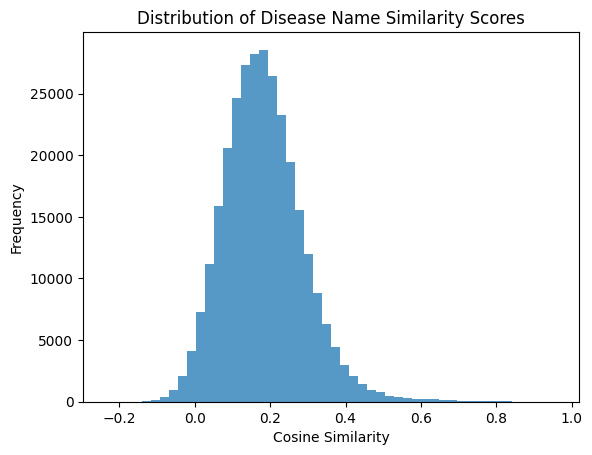

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten the matrix to get all pairwise similarity scores
similarity_scores = similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]

# Plot the histogram
plt.hist(similarity_scores, bins=50, alpha=0.75)
plt.title("Distribution of Disease Name Similarity Scores")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.show()

In [51]:
# Extract top pairs with similarity > 0.8
threshold = 0.8
similar_pairs = []

for i in range(len(disease_names)):
    for j in range(i + 1, len(disease_names)):  # Only look at upper triangle
        if similarity_matrix[i, j] > threshold:
            similar_pairs.append((disease_names[i], disease_names[j], similarity_matrix[i, j]))

# Sort pairs by similarity
similar_pairs = sorted(similar_pairs, key=lambda x: x[2], reverse=True)

# Display top pairs
for pair in similar_pairs:  # Inspect top 10 pairs
    print(pair)

('chronic rheumatic fever', 'rheumatic fever', 0.9597815)
('lymphangitis', 'lymphadenitis', 0.9548304)
('acute bronchiolitis', 'acute bronchitis', 0.94104856)
('chronic otitis media', 'otitis media', 0.91650856)
('vaginal yeast infection', 'yeast infection', 0.9064124)
('paroxysmal ventricular tachycardia', 'paroxysmal supraventricular tachycardia', 0.9062076)
('acute otitis media', 'otitis media', 0.90365785)
('conjunctivitis due to bacteria', 'conjunctivitis', 0.90232337)
('idiopathic excessive menstruation', 'idiopathic infrequent menstruation', 0.8992641)
('conjunctivitis due to allergy', 'conjunctivitis', 0.89710575)
('acute otitis media', 'chronic otitis media', 0.8963108)
('diverticulosis', 'diverticulitis', 0.89229035)
('injury of the ankle', 'fracture of the ankle', 0.889172)
('open wound of the cheek', 'open wound of the face', 0.8851643)
('injury to the shoulder', 'fracture of the shoulder', 0.88368016)
('urinary tract obstruction', 'bladder obstruction', 0.88194346)
('conju

In [50]:
len(similar_pabirs)

81

In [ ]:
''' Diseases seem super close sometimes, mostly beause they are super specific not sure if it makes sense to cluster them with this methods since it will impact our recall / accuracy based on NLP methods'''
''' Maybe cluster thanks to symptoms is more consistent, since it should ave a direct impact on the KPI's, also make sense to group disease by symptoms for the users'''

#### 1.3.2 Using cosine_similarities  (Disease name similarities)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
import numpy as np

# Get symptom vectors
symptom_vectors = df_symp.iloc[:, 1:].values  # Assuming symptoms are columns after 'diseases'

# Compute cosine similarity
cosine_sim_matrix = cosine_similarity(symptom_vectors)

# Optional: Jaccard similarity for binary vectors
jaccard_sim_matrix = np.zeros((len(symptom_vectors), len(symptom_vectors)))
for i in range(len(symptom_vectors)):
    for j in range(len(symptom_vectors)):
        jaccard_sim_matrix[i, j] = jaccard_score(symptom_vectors[i], symptom_vectors[j])

## 2 Classification model

### 2.1 Random forest

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score

In [20]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded

array([516, 516, 516, ..., 491, 491, 491])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.35,     # 35% test split
    random_state=42,   # for reproducibility
    stratify=y_encoded # ensures balanced distribution of diseases in train/test
)

In [23]:
rf_classifier = RandomForestClassifier(
    n_estimators=100,    # number of trees
    random_state=42,
    max_depth=30,      # let it grow fully, can tune later
    n_jobs=-1            # use all available CPU cores
)


In [24]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_jobs=-1, random_state=42)

In [25]:
y_pred = rf_classifier.predict(X_test)

y_pred

array([659, 277, 172, ..., 393, 329, 354])

In [26]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7542030662424067

In [29]:
from sklearn.metrics import recall_score

# Macro-averaged recall
macro_recall = recall_score(y_test, y_pred, average='macro')

# Weighted-averaged recall
weighted_recall = recall_score(y_test, y_pred, average='weighted')

print(f"Macro-Averaged Recall: {macro_recall:.4f}")
print(f"Weighted-Averaged Recall: {weighted_recall:.4f}")

Macro-Averaged Recall: 0.5209
Weighted-Averaged Recall: 0.7542


In [28]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))



Classification Report:
                                                          precision    recall  f1-score   support

                               abdominal aortic aneurysm       1.00      0.58      0.74        48
                                        abdominal hernia       0.96      0.94      0.95       142
                                         abscess of nose       0.94      0.88      0.91       102
                                     abscess of the lung       0.00      0.00      0.00         7
                                  abscess of the pharynx       0.00      0.00      0.00       119
                                    acanthosis nigricans       1.00      0.45      0.62        11
                                               acariasis       0.00      0.00      0.00        13
                                               achalasia       0.71      0.34      0.47        29
                                                    acne       0.96      0.66      0.78      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 2.2 other

# Global health file

In [ ]:
df_glob= pd.read_csv('/home/greg_ytch/code/Gregytch/MedAI/raw_data/Global Health Statistics.csv')

In [ ]:
df_glob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   Country                             1000000 non-null  object 
 1   Year                                1000000 non-null  int64  
 2   Disease Name                        1000000 non-null  object 
 3   Disease Category                    1000000 non-null  object 
 4   Prevalence Rate (%)                 1000000 non-null  float64
 5   Incidence Rate (%)                  1000000 non-null  float64
 6   Mortality Rate (%)                  1000000 non-null  float64
 7   Age Group                           1000000 non-null  object 
 8   Gender                              1000000 non-null  object 
 9   Population Affected                 1000000 non-null  int64  
 10  Healthcare Access (%)               1000000 non-null  float64
 11  Doctors per 